In [1]:
 import pandas as pd
import numpy as np
import numpy.ma as ma
import math as m
import matplotlib.pyplot as plt;
plt.rcdefaults()
import seaborn as sns
import statistics as st
from IPython.display import display, HTML
import re

In [2]:
data = pd.read_csv("train.csv")



pass_ID=data.iloc[:,0]
survived=data.iloc[:,1]
pclass=data.iloc[:,2]
name=data.iloc[:,3]
sex=data.iloc[:,4]
age=data.iloc[:,5]
sibsp=data.iloc[:,6]
parch=data.iloc[:,7]
ticket=data.iloc[:,8]
fare=data.iloc[:,9]
cabin=data.iloc[:,10]
embarked=data.iloc[:,11]

NR=np.size(np.array(survived),axis=0);
nann=[];

for i in range(12):
    
    nann.append(np.size(np.where(data.iloc[:,i].isna())))
    
    

print('Embarked has '+str(nann[11])+' NaN values-> '+str(nann[11]/NR *100)+'%')
print('Age has '+str(nann[5])+' NaN values-> '+str(nann[5]/NR *100)+'%')
print('Cabin has '+str(nann[10])+' NaN values-> '+str(nann[10]/NR *100)+'%')



Embarked has 2 NaN values-> 0.22446689113355783%
Age has 177 NaN values-> 19.865319865319865%
Cabin has 687 NaN values-> 77.10437710437711%


In [3]:
Mr= name.str.find('Mr.')

Miss= name.str.find('Miss')

Mrs= name.str.find('Mrs')

Master= name.str.find('Master')

Rev= name.str.find('Rev')

Dr= name.str.find('Dr')

Col= name.str.find('Col')

o=Mr*Mrs;

for i in range(NR):
    
    if o[i]>0 and o[i]!=1:
        
        Mr[i]=-1;
        
title=[];
a1=0;
a2=0;
a3=0;
a4=0;
a5=0;
a6=0;
a7=0;
    
for i in range(NR):
    
    if Mr[i]>0:
        
        title.append('Mr')
        a1=a1+1
        
    elif Miss[i]>0:
        
        title.append('Miss')
        a2=a2+1
        
    elif Mrs[i]>0:
        
        title.append('Mrs')
        a3=a3+1
        
    elif Master[i]>0:
        
        title.append('Master')
        a4=a4+1
        
    elif Dr[i]>0:
        
        title.append('Dr')
        a5=a5+1
        
    elif Rev[i]>0:
        
        title.append('Rev')
        a6=a6+1
        
    
    elif Col[i]>0:
        
        title.append('Col')
        a7=a7+1
        
    else :
        
        title.append('others')
    
        
print('we have '+str( a1 )+' Mr title')
print('we have '+str( a2 )+' Miss title')
print('we have '+str( a3 )+' Mrs title')
print('we have '+str( a4 )+' Master title')
print('we have '+str( a5 )+' Dr title')
print('we have '+str( a6 )+' Rev title')
print('we have '+str( a7 )+' Col title')


for i in range(NR):
    
    if (title[i] is 'Miss')or(title[i] is 'Mrs'):
        
        title[i]='Mrss'
        
    if (title[i]!='Mr')and((title[i] !='Mrss')) :
        
        title[i]='others'
        
        
title=pd.DataFrame(title);

e1=np.where(np.hstack(np.array(title)=='Mr'))

e2=np.where(np.hstack(np.array(title)=='Mrss'))

e3=np.where(np.hstack(np.array(title)=='others'))

Title=np.ones([NR,1]);

Title[e2]=2;
Title[e3]=3;

Title=pd.DataFrame(Title);

we have 517 Mr title
we have 182 Miss title
we have 127 Mrs title
we have 40 Master title
we have 7 Dr title
we have 6 Rev title
we have 2 Col title


In [4]:
k=np.where(age.isna())
npage=np.array(age)

k1=np.where(np.hstack(np.array(title)=='Mr'))

k2= np.where(np.hstack(np.array(title)=='Mrss'))

k3= np.where(np.hstack(np.array(title)=='others'))

mage=ma.masked_array(npage,np.isnan(npage))

o1=np.sum(mage[k1])/np.size(k1)
o2=np.sum(mage[k2])/np.size(k2)
o3=np.sum(mage[k3])/np.size(k3)

p1=np.hstack(np.array(title)=='Mr')
p0=np.array(age.isna())
p2=np.hstack(np.array(title)=='Mrss')
p3=np.hstack(np.array(title)=='others')

j0=np.where(p0&p1);
j1=np.where(p0&p2);
j2=np.where(p0&p3);

npage[j0]=m.ceil(o1);
npage[j1]=m.floor(o2);
npage[j2]=m.ceil(o3);

agee=pd.DataFrame(npage)


print('for Mr title,mean is '+str(o1))
print('for Mrss title,mean is '+str(o2))
print('for others title,mean is '+str(o3))


for Mr title,mean is 24.91779497098646
for Mrss title,mean is 23.067961165048544
for others title,mean is 18.379538461538463


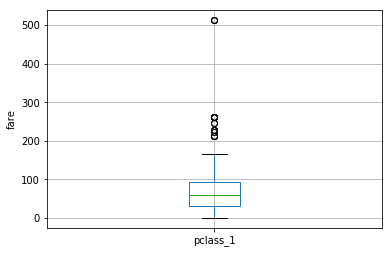

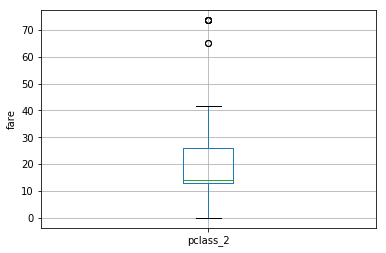

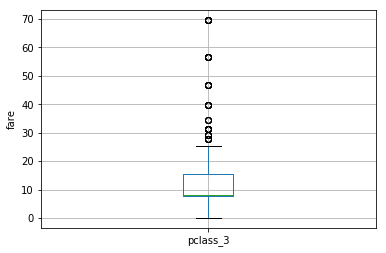

In [5]:
k=np.hstack(np.array(fare)==0)
npfare=np.array(fare)

k1=np.where(np.hstack(np.array(pclass)==1))
k2=np.where(np.hstack(np.array(pclass)==2))
k3=np.where(np.hstack(np.array(pclass)==3))

f1=np.array(npfare[k1]);
f2=np.array(npfare[k2]);
f3=np.array(npfare[k3]);

plt.figure()
df = pd.DataFrame(f1,columns=['pclass_1'])
boxplot = df.boxplot(column=['pclass_1'])
plt.ylabel('fare')
#plt.show()
df = pd.DataFrame(f2,columns=['pclass_2'])
plt.figure()
boxplot = df.boxplot(column=['pclass_2'])
plt.ylabel('fare')
df = pd.DataFrame(f3,columns=['pclass_3'])
plt.figure()
boxplot = df.boxplot(column=['pclass_3'])
plt.ylabel('fare')


c1=np.nonzero(npfare[k1])
c2=np.nonzero(npfare[k2])
c3=np.nonzero(npfare[k3])



o1=np.sum(c1)/np.size(k1)
o2=np.sum(c2)/np.size(k2)
o3=np.sum(c3)/np.size(k3)

p1=np.hstack(np.array(pclass)==1)
p2=np.hstack(np.array(pclass)==2)
p3=np.hstack(np.array(pclass)==3)

j0=np.where(k&p1);
j1=np.where(k&p2);
j2=np.where(k&p3);

npfare[j0]=o1;
npfare[j1]=o2;
npfare[j2]=o3;

faree=pd.DataFrame(npfare)



In [6]:
k1=np.where(np.hstack(np.array(embarked)=='S'))
k2=np.where(np.hstack(np.array(embarked)=='C'))
k3=np.where(np.hstack(np.array(embarked)=='Q'))
k4=k=np.where(age.isna())




k1=np.where(np.hstack(np.array(sex)=='male'))
k2= np.where(np.hstack(np.array(sex)=='female'))

ss=np.zeros([NR,1]);
ss[k1]=1;

ss=pd.DataFrame(ss)

del data['Sex']
data.insert(4, "Sex",ss, True)


In [7]:
k1=np.where(np.hstack(np.array(embarked)=='S'))
k2=np.where(np.hstack(np.array(embarked)=='C'))
k3=np.where(np.hstack(np.array(embarked)=='Q'))
k4=k=np.where(age.isna())


s1=np.zeros([NR,1]);
s1[k1]=1;

s2=np.zeros([NR,1]);
s2[k2]=1;

s3=np.zeros([NR,1]);
s3[k3]=1;

s4=np.zeros([NR,1]);
s4[k4]=1;


s1=pd.DataFrame(s1)
s2=pd.DataFrame(s2)
s3=pd.DataFrame(s3)
s4=pd.DataFrame(s4)


del data['Embarked']
data.insert(11, "Embarked 1",s1, True)
data.insert(12, "Embarked 2",s2, True)
data.insert(13, "Embarked 3",s3, True)
data.insert(14, "Embarked 4",s4, True)


In [8]:


k1=np.where(np.hstack(np.array(survived)==1))
k0=np.where(np.hstack(np.array(survived)==0))

mean_sibsp=sibsp.mean();
mode_sibsp=sibsp.mode();
variance_sibsp=sibsp.std()*sibsp.std()
median_sibsp=st.median(sibsp);
sp=np.array(sibsp)

mean_sibsp_1=sp[k1].mean();
mode_sibsp_1=st.mode(sp[k1]);
variance_sibsp_1=sp[k1].std()*sp[k1].std()
median_sibsp_1=st.median(sp[k1]);

mean_sibsp_0=sp[k0].mean();
mode_sibsp_0=st.mode(sp[k0]);
variance_sibsp_0=sp[k0].std()*sp[k0].std()
median_sibsp_0=st.median(sp[k0]);


mean_parch=parch.mean();
mode_parch=parch.mode();
variance_parch=parch.std()*parch.std()
median_parch=st.median(parch);
sp=np.array(parch)

mean_parch_1=sp[k1].mean();
mode_parch_1=st.mode(sp[k1]);
variance_parch_1=sp[k1].std()*sp[k1].std()
median_parch_1=st.median(sp[k1]);

mean_parch_0=sp[k0].mean();
mode_parch_0=st.mode(sp[k0]);
variance_parch_0=sp[k0].std()*sp[k0].std()
median_parch_0=st.median(sp[k0]);


mean_ss=ss.mean();
mode_ss=ss.mode();
variance_ss=ss.std()*ss.std()
median_ss=st.median(ss);

sp=np.hstack(np.array(ss))




mean_ss_1=sp[k1].mean();
mode_ss_1=st.mode(sp[k1]);
variance_ss_1=sp[k1].std()*sp[k1].std()
median_ss_1=st.median(sp[k1]);

mean_ss_0=sp[k0].mean();
mode_ss_0=st.mode(sp[k0]);
variance_ss_0=sp[k0].std()*sp[k0].std()
median_ss_0=st.median(sp[k0]);



mean_agee=agee.mean();
mode_agee=agee.mode();
variance_agee=agee.std()*agee.std()
median_agee=st.median(agee);

sp=np.hstack(np.array(agee))

mean_agee_1=sp[k1].mean();
mode_agee_1=st.mode(sp[k1]);
variance_agee_1=sp[k1].std()*sp[k1].std()
median_agee_1=st.median(sp[k1]);

mean_agee_0=sp[k0].mean();
mode_agee_0=st.mode(sp[k0]);
variance_agee_0=sp[k0].std()*sp[k0].std()
median_agee_0=st.median(sp[k0]);


statistics = {'Features':['age', 'sex', 'sibsp', 'parch'], 
        'mean':[mean_agee, mean_ss, mean_sibsp, mean_parch],
       'var':[variance_agee, variance_ss, variance_sibsp, variance_parch],
       'mode':[mode_agee, mode_ss, mode_sibsp, mode_parch],'median':[median_agee,median_ss, median_sibsp,median_parch],'mean_survived':[mean_agee_1, mean_ss_1, mean_sibsp_1,mean_parch_1],'var_survived':[variance_agee_1,variance_ss_1, variance_sibsp_1,variance_parch_1],
        'mode_survived':[mode_agee_1,mode_ss_1, mode_sibsp_1,mode_parch_1],'median_survived':[median_agee_1,median_ss_1, median_sibsp_1,median_parch_1],
              'mean_Nsurvived':[mean_agee_0,mean_ss_0, mean_sibsp_0,mean_parch_0],
              'var_Nsurvived':[variance_agee_0,variance_ss_0, variance_sibsp_0,variance_parch_0],'mode_Nsurvived':[mode_agee_0,mode_ss_0, mode_sibsp_0,mode_parch_0],'median_Nsurvived':[median_agee_0,median_ss_0, median_sibsp_0,median_parch_0]
       
       }

sdq= pd.DataFrame(statistics)

display(HTML(sdq.to_html()))

,Features,mean,mean_Nsurvived,mean_survived,median,median_Nsurvived,median_survived,mode,mode_Nsurvived,mode_survived,var,var_Nsurvived,var_survived
0,age,0 28.612985 dtype: float64,29.250455,27.589678,0,25.0,25.0,0 0 25.0,25.0,23.0,0 174.139506 dtype: float64,161.453210,192.295684
1,sex,0 0.647587 dtype: float64,0.852459,0.318713,0,1.0,0.0,0 0 1.0,1.0,0.0,0 0.228475 dtype: float64,0.125773,0.217135
2,sibsp,0.523008,0.553734,0.473684,0,0.0,0.0,0 0 dtype: int64,0.0,0.0,1.21604,1.656949,0.500769
3,parch,0.381594,0.329690,0.464912,0,0.0,0.0,0 0 dtype: int64,0.0,0.0,0.649728,0.676368,0.593798


Text(0,0.5,'not_Survived')

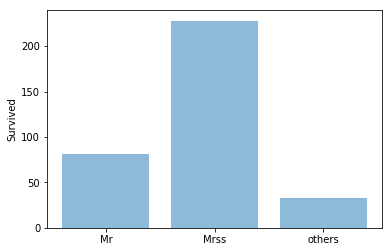

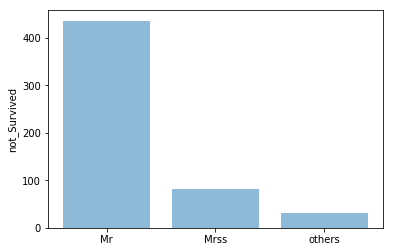

In [9]:
survived=data.iloc[:,1]
k1=np.hstack(np.array(survived)==1)
k0=np.hstack(np.array(survived)==0)

e1=np.hstack(np.array(title)=='Mr')

e2= np.hstack(np.array(title)=='Mrss')

e3= np.hstack(np.array(title)=='others')


obj=('Mr','Mrss','others');
y_pos = np.arange(len(obj))
survived=[np.size(np.where(e1&k1)),np.size(np.where(e2&k1)),np.size(np.where(e3&k1))]

plt.bar(y_pos,survived, align='center', alpha=0.5)
plt.xticks(y_pos, obj)
plt.ylabel('Survived')


nsurvived=[np.size(np.where(e1&k0)),np.size(np.where(e2&k0)),np.size(np.where(e3&k0))]
plt.figure()
plt.bar(y_pos,nsurvived, align='center', alpha=0.5)
plt.xticks(y_pos, obj)
plt.ylabel('not_Survived')



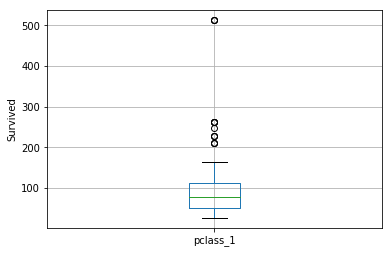

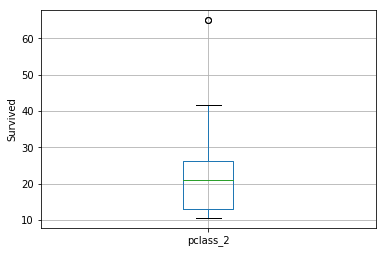

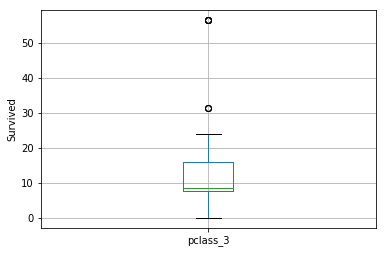

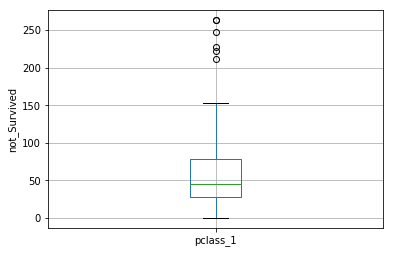

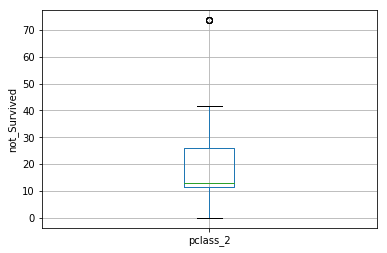

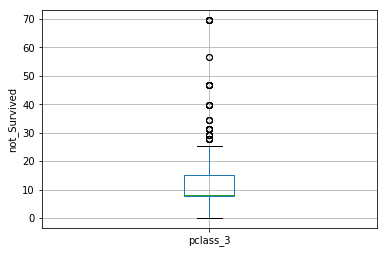

In [10]:
survived=data.iloc[:,1]
k1=np.hstack(np.array(survived)==1)
k0=np.hstack(np.array(survived)==0)

npfare=np.array(fare)

e1=np.hstack(np.array(pclass)==1)
e2=np.hstack(np.array(pclass)==2)
e3=np.hstack(np.array(pclass)==3)

f1=np.array(npfare[np.where(e1&k1)]);
f2=np.array(npfare[np.where(e2&k1)]);
f3=np.array(npfare[np.where(e3&k1)]);


plt.figure()
df = pd.DataFrame(f1,columns=['pclass_1'])

boxplot = df.boxplot(column=['pclass_1'])
plt.ylabel('Survived')

df = pd.DataFrame(f2,columns=['pclass_2'])
plt.figure()
boxplot = df.boxplot(column=['pclass_2'])
plt.ylabel('Survived')

df = pd.DataFrame(f3,columns=['pclass_3'])
plt.figure()
boxplot = df.boxplot(column=['pclass_3'])
plt.ylabel('Survived')


f1=np.array(npfare[np.where(e1&k0)]);
f2=np.array(npfare[np.where(e2&k0)]);
f3=np.array(npfare[np.where(e3&k0)]);


plt.figure()
df = pd.DataFrame(f1,columns=['pclass_1'])

boxplot = df.boxplot(column=['pclass_1'])
plt.ylabel('not_Survived')

df = pd.DataFrame(f2,columns=['pclass_2'])
plt.figure()
boxplot = df.boxplot(column=['pclass_2'])
plt.ylabel('not_Survived')

df = pd.DataFrame(f3,columns=['pclass_3'])
plt.figure()
boxplot = df.boxplot(column=['pclass_3'])
plt.ylabel('not_Survived')

plt.show()

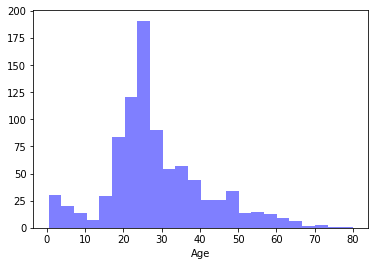

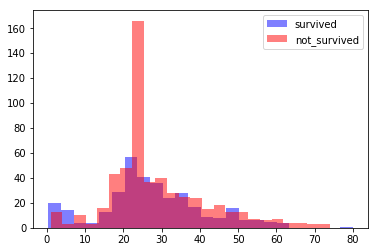

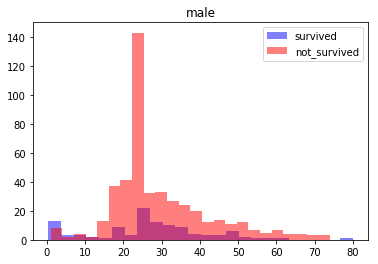

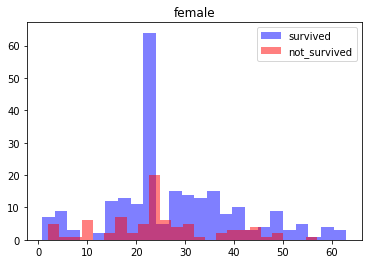

In [11]:
bins=m.ceil(1+3.332*m.log(NR))

npage=np.array(agee)

plt.hist(npage,bins, facecolor='blue', alpha=0.5)
plt.xlabel('Age')
plt.show()

survived=data.iloc[:,1]
k1=np.hstack(np.array(survived)==1)
k0=np.hstack(np.array(survived)==0)

z1=np.where(k1)
z2=np.where(k0)

plt.figure()
plt.hist(npage[np.where(k1)],bins, facecolor='blue', alpha=0.5,label='survived')
plt.hist(npage[np.where(k0)],bins, facecolor='red', alpha=0.5,label='not_survived')
plt.legend(loc='upper right')
plt.show()


e1=np.hstack(np.array(sex)=='male')
e2= np.hstack(np.array(sex)=='female')

plt.figure()
plt.hist(npage[np.where(k1&e1)],bins, facecolor='blue', alpha=0.5,label='survived')
plt.hist(npage[np.where(k0&e1)],bins, facecolor='red', alpha=0.5,label='not_survived')
plt.legend(loc='upper right')
plt.title('male')
plt.show()


plt.figure()
plt.hist(npage[np.where(k1&e2)],bins, facecolor='blue', alpha=0.5,label='survived')
plt.hist(npage[np.where(k0&e2)],bins, facecolor='red', alpha=0.5,label='not_survived')
plt.legend(loc='upper right')
plt.title('female')
plt.show()


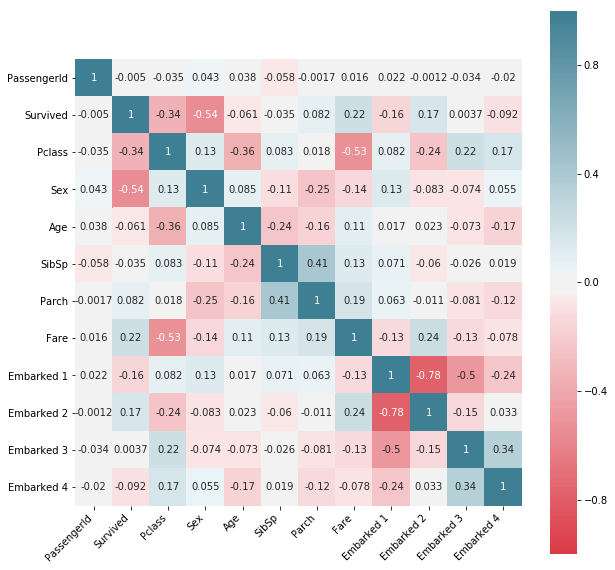

In [12]:
del data['Age']
del data['Fare']
data.insert(5, "Age",agee, True)
data.insert(9, "Fare",faree, True)


corr = data.corr()
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)


In [13]:
k1=np.hstack(np.array(sex)=='male')
k2= np.hstack(np.array(sex)=='female')

e1=np.hstack(np.array(agee)<=10)
e2=np.hstack(np.array(agee)>10)

kind1=np.hstack(np.zeros([NR,1]));
kind2=np.hstack(np.zeros([NR,1]));
kind3=np.hstack(np.zeros([NR,1]));

kind1[np.where(e1)]=1;

kind2[np.where(e2&k1)]=1;

kind3[np.where(e2&k2)]=1;

kind1= pd.DataFrame(kind1)
kind2= pd.DataFrame(kind2)
kind3= pd.DataFrame(kind3)



data.insert(15, "Kind1",kind1, True)
data.insert(16, "Kind2",kind2, True)
data.insert(17, "Kind3",kind3, True)

In [14]:
oo=sibsp+parch;
rel=pd.DataFrame(oo)
k1=np.where(np.hstack(np.array(oo)==0))
k2=np.where(np.hstack(np.array(oo)>0))

alone=np.hstack(np.zeros([NR,1]));

alone[k2]=1;

alone= pd.DataFrame(alone)
data.insert(18, "Lonliness",alone, True)
data.insert(19, "Rel",rel, True)

In [15]:

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

oo = [data]

for i in oo:
    i['Cabin'] = i['Cabin'].fillna("U0")
    i['Deck'] = i['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    i['Deck'] = i['Deck'].map(deck)
    i['Deck'] = i['Deck'].fillna(0)
    i['Deck'] = i['Deck'].astype(int)
    l=i['Deck'];

Deck=pd.DataFrame(l);
del data['Cabin']
del data['Deck']
data.insert(10, "Deck",Deck, True)
data.insert(4, "Title",Title, True)
display(HTML(data.to_html()))

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked 1,Embarked 2,Embarked 3,Embarked 4,Kind1,Kind2,Kind3,Lonliness,Rel
0,1,0,3,"Braund, Mr. Owen Harris",1.0,1.0,22.00,1,0,A/5 21171,7.250000,8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2.0,0.0,38.00,1,0,PC 17599,71.283300,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",2.0,0.0,26.00,0,0,STON/O2. 3101282,7.925000,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2.0,0.0,35.00,1,0,113803,53.100000,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4,5,0,3,"Allen, Mr. William Henry",1.0,1.0,35.00,0,0,373450,8.050000,8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,6,0,3,"Moran, Mr. James",1.0,1.0,25.00,0,0,330877,8.458300,8,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",1.0,1.0,54.00,0,0,17463,51.862500,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",3.0,1.0,2.00,3,1,349909,21.075000,8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2.0,0.0,27.00,0,2,347742,11.133300,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",2.0,0.0,14.00,1,0,237736,30.070800,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1


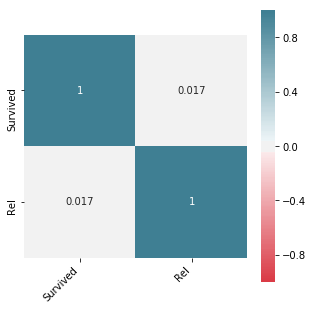

In [20]:
df = pd.DataFrame(columns=['Survived','Rel'])
df.insert(0, "Survived",survived, True)
df.insert(1, "Rel",rel, True)
corr = df.corr()
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

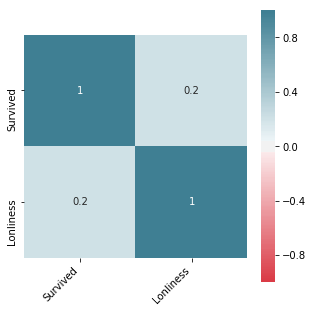

In [21]:
df = pd.DataFrame(columns=['Survived','Rel'])
df.insert(0, "Survived",survived, True)
df.insert(1, "Lonliness",alone, True)
corr = df.corr()
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(5)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);